In [1]:
# September 20, 2017
# Udemy Machine Learning A-Z
# Logistic

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import pandas as pd

In [4]:
datasocial = pd.read_csv('Social_Network_Ads.csv')

datasocial.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
x = datasocial.iloc[:, 2:4].values # the exercise doesn't use gender

In [18]:
y = datasocial.iloc[:, -1].values
len(y)

400

In [28]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [29]:
from sklearn.preprocessing import StandardScaler

scale_x = StandardScaler()
x_train = scale_x.fit_transform(x_train)
x_test = scale_x.fit_transform(x_test)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [40]:
from sklearn.linear_model import LogisticRegression

reg_logit = LogisticRegression(random_state = 0)

In [41]:
reg_logit.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred = reg_logit.predict(x_test)

In [48]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [49]:
cm

array([[63,  5],
       [ 7, 25]])

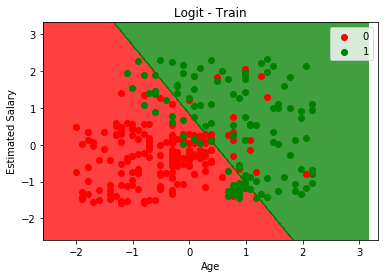

In [52]:
# Visualizing the Results Training Set

from matplotlib.colors import ListedColormap # library to create mesh grid

x_set, y_set = x_train, y_train # renaming to make it easier to make several maps

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01), 
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

# above lines establish the range of values; +/- 1 to avoid squeezing data on the edges of the plot
# these correspond to the fills

plt.contourf(x1, x2, reg_logit.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green'))) # this actually fills the plot

plt.xlim(x1.min(), x1.max())

plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j) # plot each data point
    
plt.title('Logit - Train')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

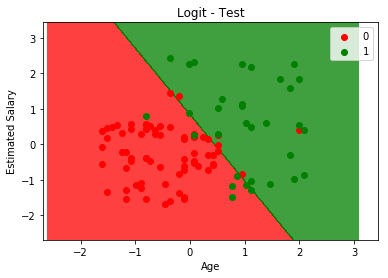

In [54]:
# Visualizing the Results for Testing Set

from matplotlib.colors import ListedColormap

x_set, y_set = x_test, y_test

x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

plt.contourf(x1, x2, reg_logit.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(x1.min(), x1.max())

plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logit - Test')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()